<a href="https://colab.research.google.com/github/junioradkn/quantum-password-hacking./blob/main/Grover's%20algorithm%20code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Week 1

In [ ]:
!pip install qiskit==0.45.0 qiskit-aer==0.13.0 --quiet

Fatal Python error: init_import_site: Failed to import the site module
Python runtime state: initialized
Traceback (most recent call last):
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap>", line 980, in exec_module
  File "<frozen site>", line 642, in <module>
  File "<frozen site>", line 629, in main
  File "<frozen site>", line 410, in addsitepackages
  File "<frozen site>", line 242, in addsitedir
  File "<frozen site>", line 201, in addpackage
  File "<string>", line 0, in <module>
KeyboardInterrupt


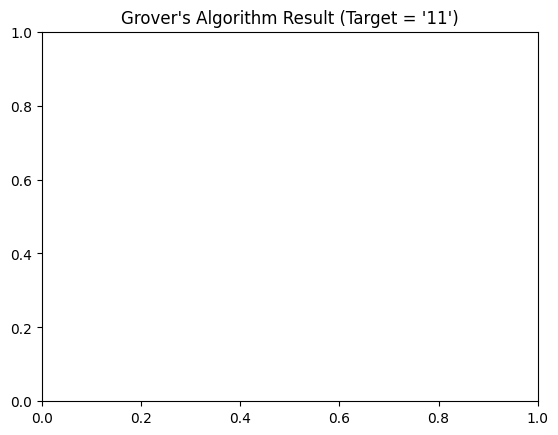

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

def oracle(circuit):
    circuit.cz(0, 1)

def diffuser(circuit):
    circuit.h([0, 1])
    circuit.x([0, 1])
    circuit.h(1)
    circuit.cx(0, 1)
    circuit.h(1)
    circuit.x([0, 1])
    circuit.h([0, 1])

grover_circuit = QuantumCircuit(2)
grover_circuit.h([0, 1])
oracle(grover_circuit)
diffuser(grover_circuit)
grover_circuit.measure_all()

simulator = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend=simulator, shots=1024)
result = job.result()
counts = result.get_counts()

plot_histogram(counts)
plt.title("Grover's Algorithm Result (Target = '11')")
plt.show()

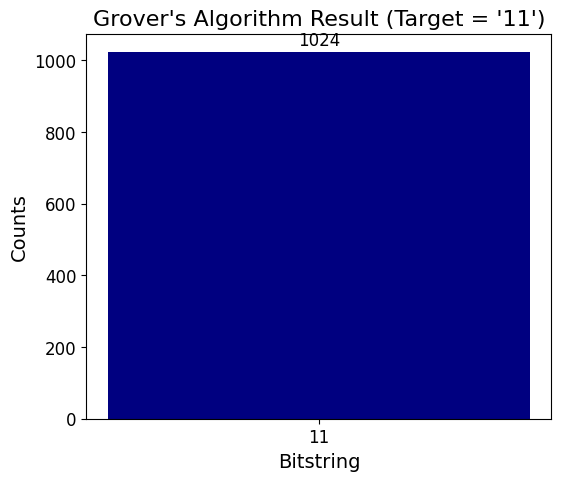

In [ ]:
import matplotlib.pyplot as plt

# Pass the data (counts) yourself
labels = list(counts.keys())
values = list(counts.values())

# Draw bar graphs manually
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color='navy')
plt.title("Grover's Algorithm Result (Target = '11')", fontsize=16)
plt.xlabel("Bitstring", fontsize=14)
plt.ylabel("Counts", fontsize=14)

# Write values (counts) above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(values) + 50)
plt.show()

Week 2

In [ ]:
# Reinstall it once (with fixed version)
!pip uninstall -y numpy
!pip install numpy==1.23.5
!pip install qiskit==0.45.0 qiskit-aer==0.12.1 --quiet

Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 95.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blosc2 3.5.1 requires numpy>=1.26, but you have numpy 1.23.5 which is incompatible.
db-dtypes 1.4.3 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.23.5 which is incompatible.
treescope 0.1.9 requires numpy>=1.25.2, but you have numpy 1.23.5 which is incompatible.
bigframes 2.8.0 requires numpy>=1.24.0, but you have numpy 1.23.5 which is incompatible.
xarray-einstats 0.9.1 requires numpy>=1.25, but you have numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 68.7 MB/s eta 0:00:00


/tmp/ipython-input-5-2895348206.py:28: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(nqubits - 1)), nqubits - 1)


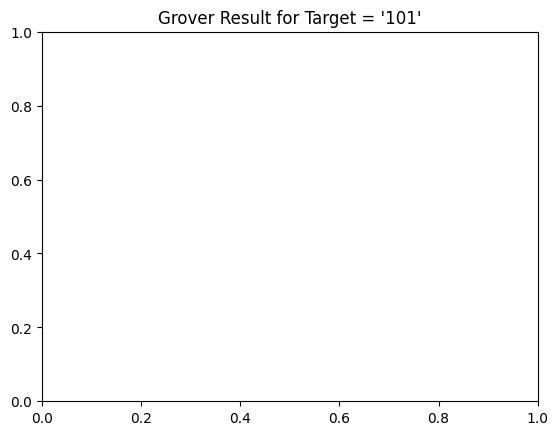

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

# 1. target（ex: '101'）
target = '101'

# 2. define an Oracle
def grover_oracle(target):
    qc = QuantumCircuit(3)
    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)
    qc.h(2)
    qc.ccx(0, 1, 2)
    qc.h(2)
    for i, bit in enumerate(target):
        if bit == '0':
            qc.x(i)
    return qc

# 3. Diffusion operator
def diffuser(nqubits):
    qc = QuantumCircuit(nqubits)
    qc.h(range(nqubits))
    qc.x(range(nqubits))
    qc.h(nqubits - 1)
    qc.mct(list(range(nqubits - 1)), nqubits - 1)
    qc.h(nqubits - 1)
    qc.x(range(nqubits))
    qc.h(range(nqubits))
    return qc

# 4. main Circuit
qc = QuantumCircuit(3, 3)
qc.h([0, 1, 2])  # initialization

qc.compose(grover_oracle(target), inplace=True)
qc.compose(diffuser(3), inplace=True)

qc.measure([0, 1, 2], [0, 1, 2])

# 5. simulation
sim = Aer.get_backend('qasm_simulator')
result = execute(qc, backend=sim, shots=1024).result()
counts = result.get_counts()

# 6. result drawing
plot_histogram(counts)
plt.title(f"Grover Result for Target = '{target}'")
plt.show()

In [ ]:
print("Counts:", counts)

Counts: {'110': 45, '010': 32, '000': 35, '111': 24, '011': 23, '100': 31, '101': 801, '001': 33}


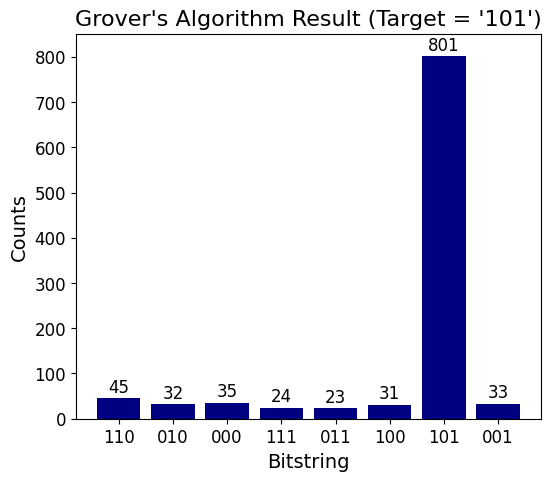

In [ ]:
import matplotlib.pyplot as plt

# pass the data（counts) yourself
labels = list(counts.keys())
values = list(counts.values())

# draw bar graphs manually
plt.figure(figsize=(6, 5))
bars = plt.bar(labels, values, color='navy')

# automatically display title targets
plt.title(f"Grover's Algorithm Result (Target = '{target}')", fontsize=16)
plt.xlabel("Bitstring", fontsize=14)
plt.ylabel("Counts", fontsize=14)

# write values (counts) above the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, int(yval),
             ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, max(values) + 50)
plt.show()

In [ ]:
from qiskit import QuantumCircuit, Aer, execute

def run_grover_and_check(target: str, iterations: int = 1) -> bool:
    nqubits = len(target)
    qc = QuantumCircuit(nqubits, nqubits)

    qc.h(range(nqubits))

    for _ in range(iterations):
        # Oracle
        for i, bit in enumerate(reversed(target)):
            if bit == '0':
                qc.x(i)
        qc.h(nqubits - 1)
        qc.mct(list(range(nqubits - 1)), nqubits - 1)
        qc.h(nqubits - 1)
        for i, bit in enumerate(reversed(target)):
            if bit == '0':
                qc.x(i)

        # Diffuser
        qc.h(range(nqubits))
        qc.x(range(nqubits))
        qc.h(nqubits - 1)
        qc.mct(list(range(nqubits - 1)), nqubits - 1)
        qc.h(nqubits - 1)
        qc.x(range(nqubits))
        qc.h(range(nqubits))

    qc.measure(range(nqubits), range(nqubits))

    backend = Aer.get_backend('qasm_simulator')
    job = execute(qc, backend, shots=1)
    result = job.result()
    counts = result.get_counts()
    measured = max(counts, key=counts.get)

    return measured == target

In [ ]:
def success_rate(target: str, iterations: int, trials: int = 100) -> float:
    success = 0
    for _ in range(trials):
        if run_grover_and_check(target, iterations):
            success += 1
    return success / trials

/tmp/ipython-input-8-638824567.py:15: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(nqubits - 1)), nqubits - 1)
/tmp/ipython-input-8-638824567.py:25: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct(list(range(nqubits - 1)), nqubits - 1)


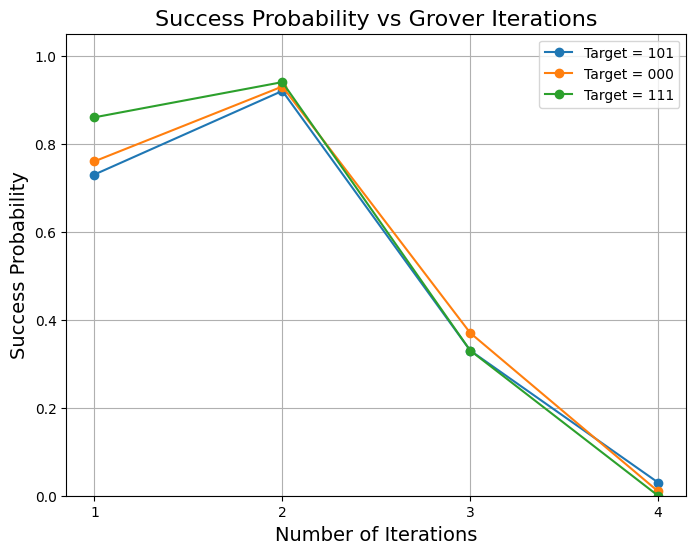

In [ ]:
import matplotlib.pyplot as plt

targets = ['101', '000', '111']
iterations_range = range(1, 5)

plt.figure(figsize=(8, 6))

for target in targets:
    rates = [success_rate(target, i) for i in iterations_range]
    plt.plot(list(iterations_range), rates, marker='o', label=f'Target = {target}')

plt.title("Success Probability vs Grover Iterations", fontsize=16)
plt.xlabel("Number of Iterations", fontsize=14)
plt.ylabel("Success Probability", fontsize=14)
plt.xticks(iterations_range)
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.show()

Week 3

In [ ]:
def grover_oracle_4bit(target):
    qc = QuantumCircuit(4)
    for i, bit in enumerate(reversed(target)):
        if bit == '0':
            qc.x(i)
    qc.h(3)
    qc.mct([0, 1, 2], 3)
    qc.h(3)
    for i, bit in enumerate(reversed(target)):
        if bit == '0':
            qc.x(i)
    return qc

def diffuser_4bit():
    qc = QuantumCircuit(4)
    qc.h(range(4))
    qc.x(range(4))
    qc.h(3)
    qc.mct([0, 1, 2], 3)
    qc.h(3)
    qc.x(range(4))
    qc.h(range(4))
    return qc

In [ ]:
def run_grover_4bit(target, iterations=4):
    qc = QuantumCircuit(4, 4)
    qc.h([0, 1, 2, 3])
    for _ in range(iterations):
        qc.compose(grover_oracle_4bit(target), inplace=True)
        qc.compose(diffuser_4bit(), inplace=True)
    qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result()
    return result.get_counts()

In [ ]:
from qiskit.providers.fake_provider import FakeJakarta
from qiskit_aer.noise import NoiseModel

backend = FakeJakarta()
noise_model = NoiseModel.from_backend(backend)

counts = execute(qc, Aer.get_backend('qasm_simulator'),
                 noise_model=noise_model,
                 shots=1024).result().get_counts()

In [ ]:
def classical_brute_force(target):
    for i in range(2**4):
        guess = format(i, '04b')
        if guess == target:
            return i  # took sometime attempt before success

/tmp/ipython-input-11-646617257.py:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1, 2], 3)
/tmp/ipython-input-11-646617257.py:19: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1, 2], 3)


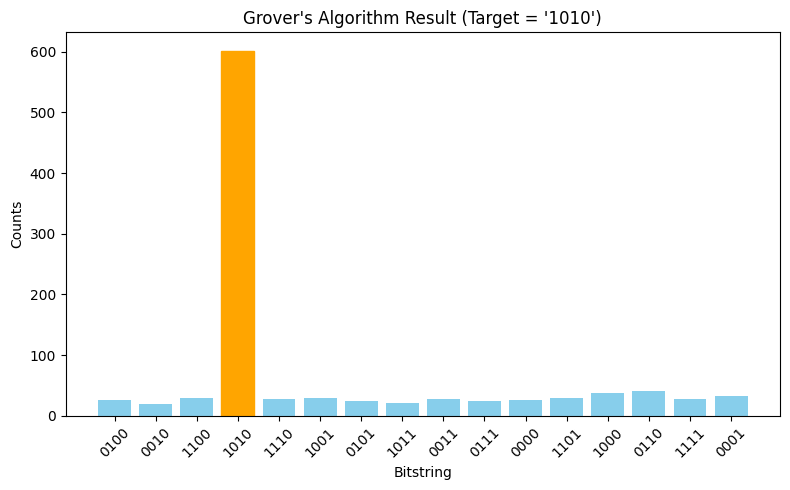

In [ ]:
import matplotlib.pyplot as plt

def plot_counts_manual(counts, target=None):
    labels = list(counts.keys())
    values = list(counts.values())

    plt.figure(figsize=(8, 5))
    bars = plt.bar(labels, values, color='skyblue')

    if target:
        for bar, label in zip(bars, labels):
            if label == target:
                bar.set_color('orange')

    plt.xlabel('Bitstring')
    plt.ylabel('Counts')
    plt.title(f"Grover's Algorithm Result (Target = '{target}')" if target else "Grover's Result")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# example
counts = run_grover_4bit(target='1010', iterations=4)
plot_counts_manual(counts, target='1010')

/tmp/ipython-input-11-646617257.py:7: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1, 2], 3)
/tmp/ipython-input-11-646617257.py:19: DeprecationWarning: The method ``qiskit.circuit.quantumcircuit.QuantumCircuit.mct()`` is deprecated as of qiskit 0.45.0. It will be removed no earlier than 3 months after the release date. Use QuantumCircuit.mcx as direct replacement.
  qc.mct([0, 1, 2], 3)


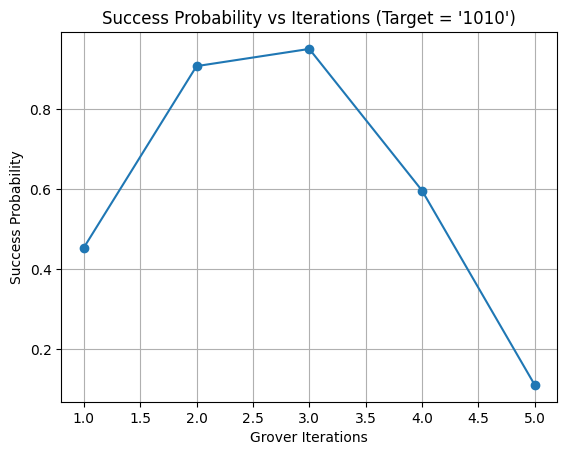

In [ ]:
iterations = range(1, 6)
target = '1010'
success_rates = []

for i in iterations:
    counts = run_grover_4bit(target=target, iterations=i)
    success = counts.get(target, 0)
    success_rates.append(success / 1024)

plt.plot(iterations, success_rates, marker='o')
plt.title(f"Success Probability vs Iterations (Target = '{target}')")
plt.xlabel("Grover Iterations")
plt.ylabel("Success Probability")
plt.grid(True)
plt.show()